In [ ]:
!pip install pymongo pymatgen matminer scikit-learn smact pandas atomate fireworks

In [ ]:
!pip install mp-api

In [ ]:
!pip install --upgrade mp-api

In [ ]:
!apt-get update
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [ ]:
!pip install dask[dataframe]

In [ ]:
!pip install dask[complete] dask-ml matminer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install joblib

In [ ]:
### General imports ###
import warnings  # Import the warnings module to manage warning messages
import numpy as np  # Import NumPy library for numerical computations
import pandas as pd  # Import Pandas library for data manipulation and analysis
import sqlite3  # Import SQLite3 library for working with SQLite databases
import os  # Import os module for operating system related functions
from tqdm import tqdm  # Import tqdm library for progress bars
import csv  # Import csv module for reading and writing CSV files
from pymongo import MongoClient  # Import MongoClient class from pymongo module for working with MongoDB
import re  # Import re module for regular expressions
import json  # Import json module for working with JSON data
from itertools import zip_longest, combinations  # Import zip_longest and combinations functions from itertools module for iterating over multiple iterables and generating combinations
from itertools import product  # Import product function from itertools module for generating cartesian products
import multiprocessing  # Import multiprocessing module for parallel computing
import scipy.stats as stats  # Import stats submodule from scipy library for statistical functions
from scipy.integrate import simps  # Import simps function from scipy.integrate module for numerical integration
import pylab as pl  # Import pylab module for MATLAB-like plotting
#import matminer  # Import matminer library for matminer-specific functions



### Matplotlib ###
import matplotlib.pyplot as plt  # Import pyplot module from Matplotlib library for plotting
import matplotlib as mpl  # Import matplotlib module for configuring Matplotlib's settings

# Suppress warnings
warnings.filterwarnings('ignore')


# Configure Matplotlib settings for LaTeX rendering
mpl.style.use('ggplot')  # Set the style of Matplotlib plots to 'ggplot'
mpl.rcParams['text.usetex'] = True  # Enable LaTeX rendering for text in plots
mpl.rcParams['text.latex.preamble'] = r'\boldmath'  # Enable LaTeX rendering for bold math symbols
mpl.rc('font', **{'family': 'serif', 'serif': 'Times New Roman', 'weight': 'bold'})  # Set font properties for Matplotlib plots
mpl.rc('lines', **{'linewidth': 4.0})  # Set default line width for plots
mpl.rcParams['figure.figsize'] = (12, 10)  # Set default figure size for plots
mpl.rcParams["font.size"] = "24"  # Set default font size for text
clrs = ['#254654', '#219e8f', '#eac563', '#f6a25a', '#e96f4c']  # Define a list of color codes for plots
mpl.rcParams['text.color'] = '#565555'  # Set default text color
mpl.rcParams['axes.labelcolor'] = '#565555'  # Set color for axis labels
mpl.rcParams['axes.labelweight'] = 'bold'  # Set weight for axis labels
mpl.rcParams['xtick.color'] = '#565555'  # Set color for x-axis ticks
mpl.rcParams['ytick.color'] = '#565555'  # Set color for y-axis ticks
mpl.rc('lines', **{'linewidth': 4.0})  # Set default line width for plots
mpl.rc('mathtext', **{'fontset': 'custom', 'rm': 'Times New Roman',
                      'it': 'Times New Roman:italic', 'bf': 'Times New Roman:bold'})  # Set font properties for math text in plots

### Pymatgen imports ###
from pymatgen.core.composition import Composition  # Import Composition class from pymatgen library for representing compositions
from pymatgen.core.structure import Structure  # Import Structure class from pymatgen library for representing crystal structures
from pymatgen.core.periodic_table import Specie  # Import Specie class from pymatgen library for representing chemical species
from pymatgen.ext.matproj import MPRester  # Import MPRester class from pymatgen library for accessing the Materials Project API

### matiminer imports ###
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval  # Import MPDataRetrieval class from matminer library for retrieving data from the Materials Project
from matminer.featurizers import composition as cf  # Import composition submodule from matminer library for composition featurization
from matminer.featurizers.conversions import StrToComposition   # Import str_to_composition function from matminer library for converting string representations of compositions to Composition objects
from matminer.featurizers.base import MultipleFeaturizer  # Import MultipleFeaturizer class from matminer library for applying multiple featurizers


### Sklearn imports ###
from sklearn import ensemble  # Import ensemble module from scikit-learn library for ensemble learning
from sklearn.linear_model import LinearRegression, Ridge  # Import LinearRegression and Ridge classes from scikit-learn library for linear regression
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function from scikit-learn library for calculating mean squared error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict  # Import KFold, cross_val_score, and cross_val_predict functions from scikit-learn library for cross-validation
from sklearn.preprocessing import StandardScaler  # Import StandardScaler class from scikit-learn library for feature scaling
from sklearn.pipeline import Pipeline  # Import Pipeline class from scikit-learn library for building pipelines
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn library for splitting data into training and testing sets
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function from scikit-learn library for evaluating model performance
from sklearn.metrics import r2_score  # Import r2_score function from scikit-learn library for evaluating model performance
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV class from scikit-learn library for hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor class from scikit-learn library for random forest regression
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor class from scikit-learn library for gradient boosting regression
from sklearn.ensemble import AdaBoostRegressor  # Import AdaBoostRegressor class from scikit-learn library for adaptive boosting regression
from sklearn.svm import SVR  # Import SVR class from scikit-learn library for support vector regression
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer class from scikit-learn library for preprocessing data
from sklearn.impute import SimpleImputer  # Import SimpleImputer class from scikit-learn library for handling missing values


### SMACT imports ###
import smact  # Import smact library for oxides df

### Filter warnings messages from the notebook ###
warnings.filterwarnings('ignore')  # Ignore all warning messages

### Set pandas view options ###
pd.set_option('display.width', 1000)  # Set the maximum width for displaying dataframes to 1000
pd.set_option('display.max_columns', None)  # Display all columns when displaying dataframes
pd.set_option('display.max_rows', None)  # Display all rows when displaying dataframes

### Set up MP API ###
API_key = os.environ.get('XXXX')  # Get the Materials Project API key from the environment variables
mpr = MPDataRetrieval(api_key='XXXX')  # Create an instance of MPDataRetrieval class with the provided API key
m = MPRester(api_key='XXXX')  # Create an instance of MPRester class with the provided API key

In [ ]:
#import the Materials Project API MPRester
from mp_api.client import MPRester
import sqlite3
import pandas as pd
import ast

# Connect to the SQLite database
conn = sqlite3.connect('drive/MyDrive/data/mp_gllbsc.db')  # Adjust the filename as needed
cursor = conn.cursor()

# Execute a query to select all data from a specific table, assuming the table is named 'data_table'
cursor.execute("SELECT * FROM number_key_values")
rows = cursor.fetchall()

# rows will contain all the data from the table
mpids, database_ids, ind_gaps = [], [], []

# Initialize an empty dictionary to temporarily hold the data
temp_data = {}

# Initialize the final list to hold combined dictionaries
cmr_data = []

# Iterate over rows and populate temp_data with mpid and database_id first
for row in rows:
    if row[0] == 'mpid' and len(row) >= 3:
        mpid = 'mp-' + str(int(row[1]))
        database_id = row[2]

        # Store the data in temp_data
        temp_data[mpid] = {'mpid': mpid, 'database_id': database_id}

# Iterate over rows again to match ind_gap with the corresponding mpid
for row in rows:
    if row[0] == 'gllbsc_ind_gap' and len(row) >= 2:
        ind_gap = row[1]
        # Find the mpid that doesn't yet have an ind_gap and add it
        for mpid, data in temp_data.items():
            if 'ind_gap' not in data:
                data['ind_gap'] = ind_gap
                cmr_data.append(data)
                break

# Print the final combined data
print("Combined data:")
for entry in cmr_data[:5]:  # Print first 5 entries for verification
    print(entry)

# Extract mpids for use with the Materials Project API
mpids = [entry['mpid'] for entry in cmr_data]

API_KEY = "XXXX"

# Fetch materials data using the new MPRester syntax and store it in a DataFrame named dataset
with MPRester(API_KEY) as mpr:
    try:
        dataset = mpr.summary.search(material_ids=mpids, fields=['material_id', 'formula_pretty', 'elements', 'formula_anonymous', 'band_gap', 'energy_above_hull'])
        dataset = pd.DataFrame([{field: getattr(doc, field) for field in ['material_id', 'formula_pretty', 'elements', 'formula_anonymous', 'band_gap', 'energy_above_hull']} for doc in dataset])
        print("\nFormatted dataset (first 5 rows):")
        print(dataset.head())
    except Exception as e:
        print(f"An error occurred: {e}")

Combined data:
{'mpid': 'mp-2715', 'database_id': 1, 'ind_gap': 0.134808936933}
{'mpid': 'mp-15642', 'database_id': 2, 'ind_gap': 0.125267952061}
{'mpid': 'mp-5821', 'database_id': 3, 'ind_gap': 0.135914121298}
{'mpid': 'mp-32447', 'database_id': 4, 'ind_gap': 0.107206732116}
{'mpid': 'mp-11520', 'database_id': 5, 'ind_gap': 0.218180448094}


Retrieving SummaryDoc documents:   0%|          | 0/2261 [00:00<?, ?it/s]


Formatted dataset (first 5 rows):
  material_id formula_pretty        elements formula_anonymous  band_gap  energy_above_hull
0    mp-31268        AlBiBr6    [Al, Bi, Br]              ABC6    2.5722           0.011579
1     mp-4495          KLiTe     [K, Li, Te]               ABC    2.4134           0.000000
2     mp-7566          InPO4      [In, O, P]              ABC4    2.3482           0.000000
3     mp-3359        Ba2SnO4     [Ba, O, Sn]             AB2C4    2.4422           0.000000
4    mp-23083       KAs4BrO6  [As, Br, K, O]            ABC4D6    2.7387           0.000000


In [ ]:
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import Stoichiometry, ElementProperty, ValenceOrbital, IonProperty, BandCenter, AtomicOrbitals
from matminer.featurizers.base import MultipleFeaturizer

# Rename some columns
dataset = dataset.rename(columns={'band_gap': 'PBE_gap'})

# Ensure the 'elements' column exists before applying the tuple function
if 'elements' in dataset.columns:
    dataset['elements'] = dataset['elements'].apply(tuple)
else:
    print("'elements' column not found in dataset")

# Ensure cmr_data_list is correctly structured
print("\nFirst 5 entries in cmr_data_list after renaming columns:")
for entry in cmr_data[:5]:
    print(entry)

# Put the gllbsc band gaps into the dataframe
for index, row in dataset.iterrows():
    for entry in cmr_data:
        if row['material_id'] == entry['mpid']:
            dataset.loc[index, 'gllbsc_gap'] = entry['ind_gap']

API_KEY = "XXXX"

# Get data from Materials Project on oxides we have in the gllbsc database
with MPRester(API_KEY) as mpr:
    try:
        oxide_mpids = mpr.summary.search(elements=['O'], material_ids=mpids, fields=['material_id'])
        oxide_mpids_df = pd.DataFrame([{field: getattr(doc, field) for field in ['material_id']} for doc in oxide_mpids])
        print("First 5 entries in oxide_mpids_df:")
        print(oxide_mpids_df.head())
    except Exception as e:
        print(f"An error occurred: {e}")

# Add an indicator to show which entries in the dataset are oxides
dataset = dataset.merge(oxide_mpids_df[['material_id']], on='material_id', how='left', indicator=True)
dataset['oxide'] = dataset['_merge'] == 'both'
dataset = dataset.drop('_merge', axis=1)

# Filter out NaNs in band gaps columns
dataset = dataset[np.isfinite(dataset['gllbsc_gap'])]
dataset = dataset[np.isfinite(dataset['PBE_gap'])]

# Pull out oxides to separate dataframe
oxides = dataset.loc[dataset['oxide'] == True]

# Ensure oxides DataFrame has the necessary columns
necessary_columns = ['material_id', 'formula_pretty', 'elements', 'formula_anonymous', 'PBE_gap', 'gllbsc_gap', 'energy_above_hull']
oxides = oxides[necessary_columns]

# Print the first few rows of the DataFrame
print(len(oxides))
print(oxides.head())

# Drop some gases and compounds in unusual oxidation states (inc peroxides)
mask = oxides['formula_pretty'].isin([
    'Mg(PO3)2', 'RbPO3', 'Na2Ca(PO3)4', 'Zn(PO3)2', 'Sr3BPO3', 'Ba3BPO3',
    'AsPO5', 'SrBPO5', 'TiSO5',
    'KAg(NO3)2', 'BrNO3', 'NaNO3', 'KNO3', 'AgNO3', 'TlNO3', 'LiNO3',
    'B6O', 'Na2O2', 'Li2O2', 'CO2', 'SO2', 'BeO'
])
oxides = oxides[~mask]

# Featurize the oxides DataFrame using matminer
# Convert 'formula_pretty' to composition object
oxides['composition_obj'] = StrToComposition().featurize_dataframe(oxides, 'formula_pretty')['composition']

# Initialize the featurizer with the desired feature calculators
feature_calculators = MultipleFeaturizer([
    Stoichiometry(),
    ElementProperty.from_preset("magpie"),
    ValenceOrbital(props=['avg']),
    IonProperty(fast=True),
    BandCenter(),
    AtomicOrbitals()
])

# Featurize the DataFrame
oxides = feature_calculators.featurize_dataframe(oxides, col_id='composition_obj')


# Print the Featurized DataFrame
print(len(oxides))
print(oxides.head())


First 5 entries in cmr_data_list after renaming columns:
{'mpid': 'mp-2715', 'database_id': 1, 'ind_gap': 0.134808936933}
{'mpid': 'mp-15642', 'database_id': 2, 'ind_gap': 0.125267952061}
{'mpid': 'mp-5821', 'database_id': 3, 'ind_gap': 0.135914121298}
{'mpid': 'mp-32447', 'database_id': 4, 'ind_gap': 0.107206732116}
{'mpid': 'mp-11520', 'database_id': 5, 'ind_gap': 0.218180448094}


Retrieving SummaryDoc documents:   0%|          | 0/771 [00:00<?, ?it/s]

First 5 entries in oxide_mpids_df:
  material_id
0    mp-28295
1    mp-19260
2    mp-20716
3    mp-17784
4    mp-19302
771
  material_id formula_pretty         elements formula_anonymous  PBE_gap  gllbsc_gap  energy_above_hull
2     mp-7566          InPO4       (In, O, P)              ABC4   2.3482    4.812382                0.0
3     mp-3359        Ba2SnO4      (Ba, O, Sn)             AB2C4   2.4422    4.783937                0.0
4    mp-23083       KAs4BrO6   (As, Br, K, O)            ABC4D6   2.7387    4.940180                0.0
5   mp-545500       BaSbClO2  (Ba, Cl, O, Sb)             ABCD2   2.8810    4.931853                0.0
6     mp-6955          KGeNO    (Ge, K, N, O)              ABCD   2.6817    4.867933                0.0


StrToComposition:   0%|          | 0/749 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/749 [00:00<?, ?it/s]

749
  material_id formula_pretty         elements formula_anonymous  PBE_gap  gllbsc_gap  energy_above_hull  composition_obj  0-norm    2-norm    3-norm    5-norm    7-norm   10-norm  MagpieData minimum Number  MagpieData maximum Number  MagpieData range Number  MagpieData mean Number  MagpieData avg_dev Number  MagpieData mode Number  MagpieData minimum MendeleevNumber  MagpieData maximum MendeleevNumber  MagpieData range MendeleevNumber  MagpieData mean MendeleevNumber  MagpieData avg_dev MendeleevNumber  MagpieData mode MendeleevNumber  MagpieData minimum AtomicWeight  MagpieData maximum AtomicWeight  MagpieData range AtomicWeight  MagpieData mean AtomicWeight  MagpieData avg_dev AtomicWeight  MagpieData mode AtomicWeight  MagpieData minimum MeltingT  MagpieData maximum MeltingT  MagpieData range MeltingT  MagpieData mean MeltingT  MagpieData avg_dev MeltingT  MagpieData mode MeltingT  MagpieData minimum Column  MagpieData maximum Column  MagpieData range Column  \
2     mp-7566    

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import joblib

# Alphabetize columns to make it easier later for use on new data
oxides = oxides.reindex(sorted(oxides.columns), axis=1)

# Choose columns to train on
X_cols = [c for c in oxides.columns if c not in [
    'material_id', 'formula_pretty', 'elements',
    'formula_anonymous','PBE_gap', 'energy_above_hull',
    'oxide', 'gllbsc_gap', 'composition_obj',
    'HOMO_character', 'HOMO_element',
    'LUMO_character', 'LUMO_element',
    'avg s valence electrons'
]]

# Define the target and features
y = oxides['gllbsc_gap'].values
X = oxides[X_cols]

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Define cross-validation strategy
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Define the preprocessing and model pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(
        max_depth=20,
        learning_rate=0.014485,
        min_samples_split=65,
        min_samples_leaf=1,
        max_features=86,
        subsample=0.9,
        n_estimators=1000
    ))
])

# Fit the model
pipeline.fit(X, y)

# Save the scaler and imputer for use in the prediction phase
joblib.dump(pipeline.named_steps['scaler'], 'scaler.pkl')
joblib.dump(pipeline.named_steps['imputer'], 'imputer.pkl')

# Get RMSE score from 10-fold CV
if __name__ == '__main__':
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=5)
    average_score = np.mean(scores)
    print('GBR model RMSE: {}'.format(np.sqrt(abs(average_score))))

GBR model RMSE: 0.9941376209305257


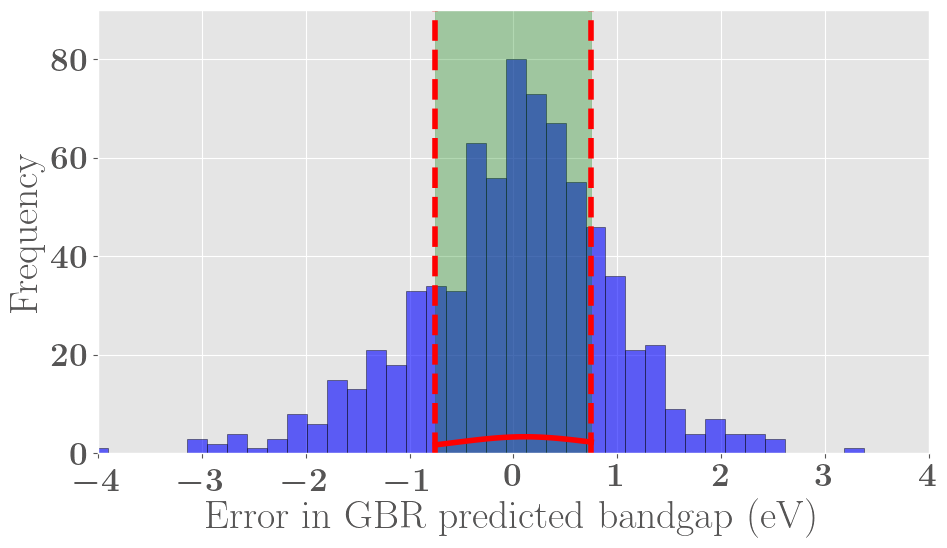

Mean error: -0.017344287370757924
Standard deviation of error: 0.9857725244132906
Area under the logistic curve: 0.6305786171001471


In [ ]:
# Generate cross-validated predictions
cv_predicted = cross_val_predict(pipeline, X, y, cv=crossvalidation, n_jobs=5)

# Error calculation
x_col = y
y_col = cv_predicted
diffs = x_col - y_col
scale = 0.50
loc = 0.11
h = sorted(diffs)
fit = stats.logistic.pdf(h, scale=scale, loc=loc)

# BG window
x1 = np.linspace(-0.75, 0.75, 100)
y1 = stats.logistic.pdf(x1, scale=scale, loc=loc)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(h, bins=45, color='blue', edgecolor='black', alpha=0.6)
plt.plot(x1, y1 * (max(h) / max(y1)), color='red')  # Scale y1 to match histogram
plt.fill_between(x1, [90 for _ in range(len(x1))], color='green', alpha=0.3)

plt.xlim(-4, 4)
plt.ylim(0, 90)
plt.axvline(x=-0.75, ls='--', color='red')
plt.axvline(x=0.75, ls='--', color='red')
plt.xlabel('Error in GBR predicted bandgap (eV)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('drive/MyDrive/Figures/PE_Dist_2023.png', dpi=300)
plt.show()

# Statistical metrics
mu = np.mean(h)
std = np.std(h)
print(f"Mean error: {mu}")
print(f"Standard deviation of error: {std}")

# Area under the curve
dx = x1[1] - x1[0]
area = simps(y1, dx=dx)
print(f"Area under the logistic curve: {area}")

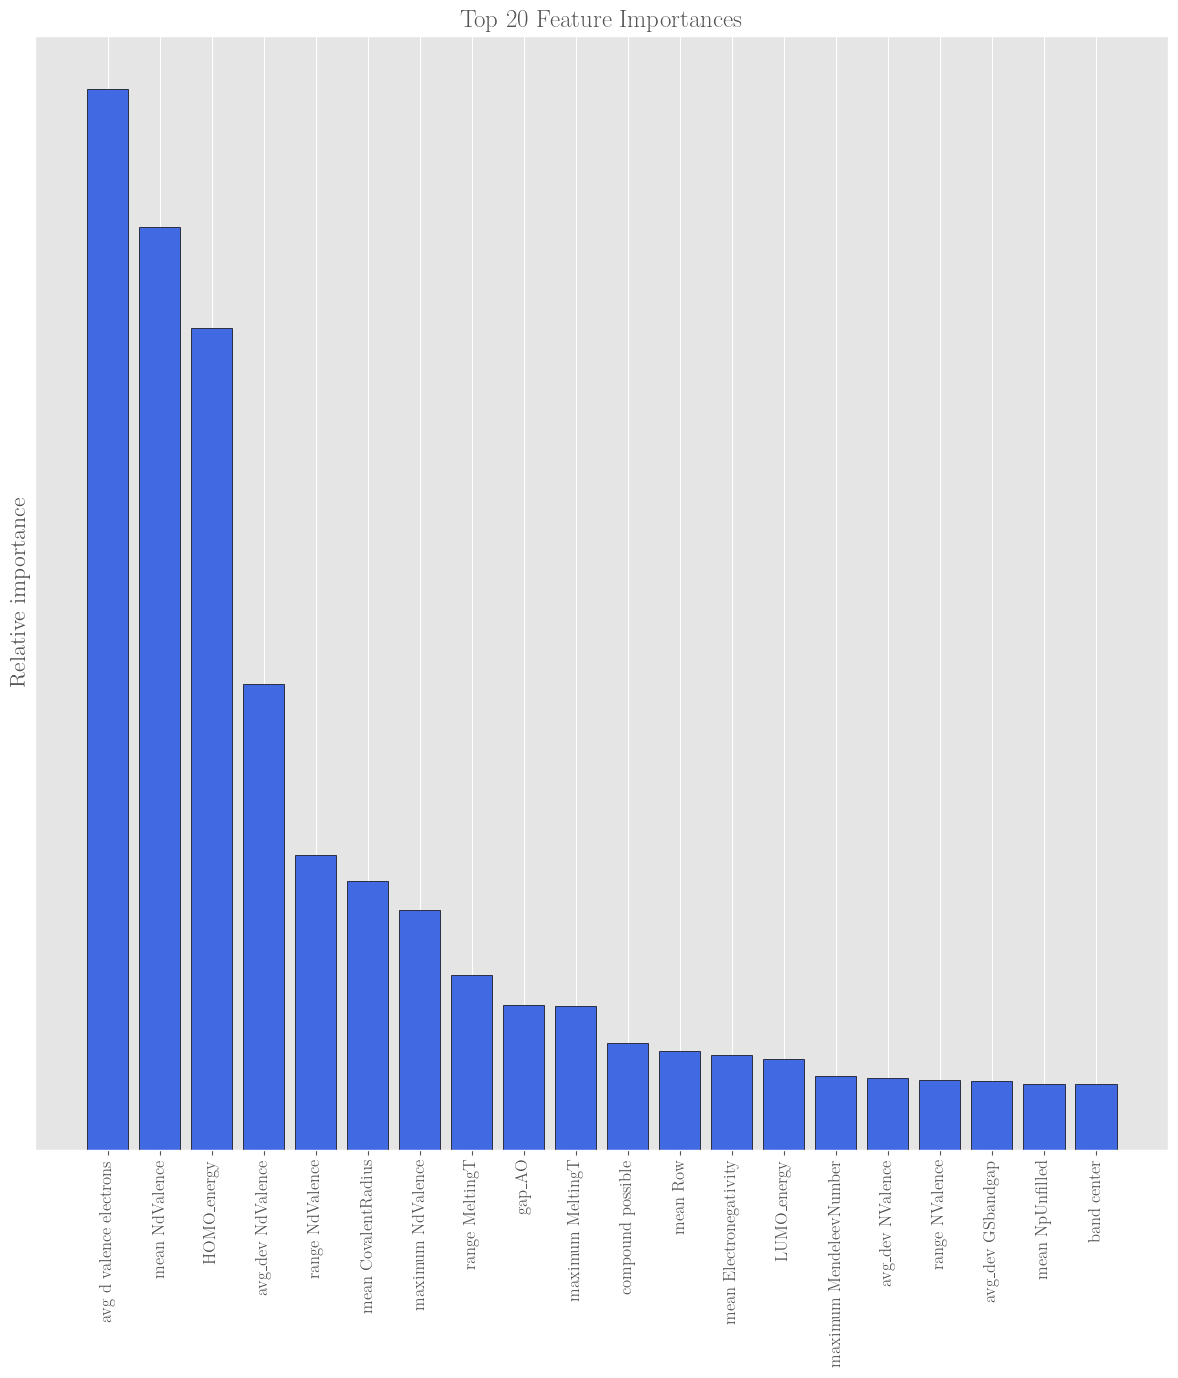

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl

# Extract the trained GBR model from the pipeline
gbr = pipeline.named_steps['gbr']

# Feature importances
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]
x_imp = [X_cols[i] for i in indices]
xtic = range(len(x_imp))
y_imp = importances[indices]

# Remove "MagpieData " prefix from labels if present
cleaned_labels = [label.replace("MagpieData ", "") for label in x_imp]

# Plot feature importances
mpl.rcParams['figure.figsize'] = (12, 14)
mpl.rcParams['text.usetex'] = True  # Enable LaTeX
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

plt.bar(xtic[:20], y_imp[:20], color='royalblue', edgecolor='black')
plt.xticks(xtic[:20], cleaned_labels[:20], rotation=90, fontsize=12)
plt.yticks([])
plt.ylabel('Relative importance', fontsize=16)
plt.title('Top 20 Feature Importances', fontsize=18)
plt.tight_layout()
plt.savefig('drive/MyDrive/Figures/Important_Features.png', dpi=300)
plt.show()

100%|██████████| 83/83 [5:24:48<00:00, 234.80s/it]


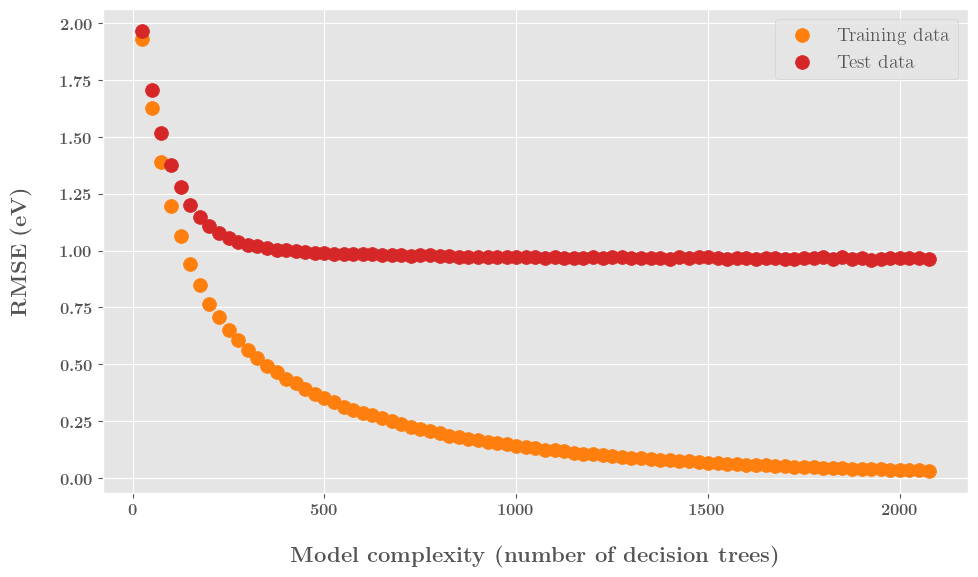

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.metrics import mean_squared_error
#from tqdm import tqdm

# Define cross-validation strategy
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize colors (clrs) if not defined
clrs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

scores_train = []
scores_test = []

# Generate models
for n_est in tqdm(range(25, 2100, 25)):
    gbr_model = GradientBoostingRegressor(
        max_depth=20, learning_rate=0.01,
        min_samples_split=65, min_samples_leaf=1,
        max_features=86, subsample=0.9, n_estimators=n_est
    )
    gbr_model.fit(X, y)
    y_pred = gbr_model.predict(X)
    scores_train.append(np.sqrt(mean_squared_error(y_true=y, y_pred=y_pred)))

    if __name__ == '__main__':
        scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=5)
        rmse_scores_gbr = [np.sqrt(abs(s)) for s in scores]
        scores_test.append(np.mean(rmse_scores_gbr))

# Plot
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(10, 6))
plt.scatter(range(25, 2100, 25), scores_train, s=100, color=clrs[1], label='Training data')
plt.scatter(range(25, 2100, 25), scores_test, s=100, color=clrs[3], label='Test data')
plt.xlabel(r'\textbf{Model complexity (number of decision trees)}', color='#565555', labelpad=20)
plt.ylabel(r'\textbf{RMSE (eV)}', color='#565555', labelpad=20)
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Figures/test_vs_train.png', dpi=300)
plt.show()

In [ ]:
### Imports ###
import smact
from smact import screening
from itertools import combinations, product

In [ ]:
from smact import element_dictionary, neutral_ratios, screening
from itertools import combinations, product

# Define the elements we are interested in
all_el = element_dictionary()  # Get a dictionary of all elements in SMACT
symbol_list = [k for k, i in all_el.items()]  # Extract a list of element symbols from the dictionary

# Define a list of elements we do not want to include
do_not_want = ['H', 'He', 'B', 'C', 'O', 'Ne', 'Ar', 'Kr', 'Tc', 'Xe', 'Rn',
               'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk',
               'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr',
               'Ra', 'Fr', 'At', 'Po', 'Pm', 'Eu', 'Tb', 'Yb']

# Filter the list of elements to exclude the ones we do not want
good_elements = [all_el[x] for x in symbol_list if x not in do_not_want]

# Generate all combinations of three elements from the filtered list
all_el_combos = list(combinations(good_elements, 3))  # Convert to list to get length for progress bar

def smact_test(els):
    all_compounds = []  # Initialize an empty list to store valid compounds
    elements = [e.symbol for e in els] + ['O']  # Get the symbols of the elements in the combination and add 'O' for oxygen

    # Get Pauling electronegativities of the three elements in the combination
    paul_a, paul_b, paul_c = els[0].pauling_eneg, els[1].pauling_eneg, els[2].pauling_eneg
    electronegativities = [paul_a, paul_b, paul_c, 3.44]  # Add the electronegativity of oxygen (3.44)

    # For each set of species (in oxidation states) apply both SMACT tests
    for ox_a, ox_b, ox_c in product(els[0].oxidation_states, els[1].oxidation_states, els[2].oxidation_states):
        ox_states = [ox_a, ox_b, ox_c, -2]  # Create a list of oxidation states including -2 for oxygen

        # Test for charge balance
        cn_e, cn_r = neutral_ratios(ox_states, threshold=8)  # Check if the compound can be charge balanced

        if cn_e:
            # Electronegativity test
            electroneg_OK = screening.pauling_test(ox_states, electronegativities)  # Check if the compound passes the Pauling electronegativity test
            if electroneg_OK:
                compound = tuple([elements, cn_r[0]])  # Create a tuple of the elements and their charge-neutral ratios
                all_compounds.append(compound)  # Add the valid compound to the list
    return all_compounds  # Return the list of valid compounds

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm

if __name__ == "__main__":
    # Use a Pool for multiprocessing
    with Pool() as p:
        # Wrap the imap call with tqdm to add a progress bar
        result = list(tqdm(p.imap(smact_test, all_el_combos, chunksize=10), total=len(all_el_combos)))

    # Flatten the result list
    flat_list = [item for sublist in result for item in sublist]

    # Print the number of compositions
    print("Number of compositions: {0}".format(len(flat_list)))

In [ ]:
from pymatgen.core.composition import Composition
import pandas as pd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [ ]:
def comp_maker(comp):
    form = []
    for el, ammt in zip(comp[0], comp[1]):
        form.append(el)
        form.append(ammt)
    form = ''.join(str(e) for e in form)
    pmg_form = Composition(form).reduced_formula
    return pmg_form

In [ ]:
if __name__ == "__main__":
    from pymatgen.core.composition import Composition
    import pandas as pd
    import dask.dataframe as dd
    from dask.diagnostics import ProgressBar
    from matminer.featurizers.composition import MultipleFeaturizer, StrToComposition
    import matminer.featurizers.composition as cf

    # Use a Pool for multiprocessing
    with Pool() as p:
        pretty_formulas = p.map(comp_maker, flat_list)

    # Convert to Dask DataFrame
    unique_pretty_formulas = list(set(pretty_formulas))
    print("Number of unique compositions formulas: {0}".format(len(unique_pretty_formulas)))
    new_data = pd.DataFrame(unique_pretty_formulas, columns=['pretty_formula'])
    new_data_dd = dd.from_pandas(new_data, npartitions=10)

    # Convert 'pretty_formula' to composition object using StrToComposition
    str_to_comp = StrToComposition()
    new_data_dd = str_to_comp.featurize_dataframe(new_data_dd, 'pretty_formula')

    # Define feature calculators
    feature_calculators = MultipleFeaturizer([cf.Stoichiometry(),
                                              cf.ElementProperty.from_preset("magpie"),
                                              cf.ValenceOrbital(props=['avg']),
                                              cf.IonProperty(fast=True),
                                              cf.BandCenter(), cf.AtomicOrbitals()])

    # Featurize dataframe
    with ProgressBar():
        new_data_dd = feature_calculators.featurize_dataframe(new_data_dd, col_id='composition', inplace=False)

    # Compute and gather results
    new_data = new_data_dd.compute()

    # Describe the DataFrame
    print(new_data.describe())

    # Save as .csv file
    new_data.to_csv('drive/MyDrive/data/All_oxide_comps_dataframe_featurized.csv', index=False, chunksize=10000)

In [ ]:
# Save the feature names used during training
with open('feature_names.txt', 'w') as f:
    for item in X.columns:
        f.write("%s\n" % item)

In [ ]:
import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

# Load the trained scaler and imputer
scaler = joblib.load('scaler.pkl')
imputer = joblib.load('imputer.pkl')

# Load the feature names from the training phase
with open('feature_names.txt', 'r') as f:
    trained_feature_names = [line.strip() for line in f]

# Define the path to the input and output files
input_file = 'drive/MyDrive/data/All_oxide_comps_dataframe_featurized.csv'
output_file_template = 'drive/MyDrive/data/results/new_data_with_predictions_part_{}.csv'

# Load the original CSV to get the original values
original_data = pd.read_csv(input_file)

# Define a function to process a chunk of data
def process_chunk(chunk, chunk_index):
    # Drop the unnecessary column
    chunk = chunk.drop(columns=['Unnamed: 0'])

    # Rename the columns
    chunk = chunk.rename(columns={
        'task_id': 'material_id',
        'pretty_formula': 'formula_pretty',
        'anonymous_formula': 'formula_anonymous',
        'e_above_hull': 'energy_above_hull'
    })

    # Ensure columns match the trained features, preserving existing values
    current_feature_names = chunk.columns.tolist()
    missing_features = set(trained_feature_names) - set(current_feature_names)
    additional_features = set(current_feature_names) - set(trained_feature_names)

    # Print diagnostic information if there are mismatches
    if missing_features or additional_features:
        print(f"Chunk {chunk_index} - Missing features: {missing_features}")
        print(f"Chunk {chunk_index} - Additional features: {additional_features}")

    # Align the chunk with the trained features
    for feature in missing_features:
        chunk[feature] = 0

    chunk = chunk[trained_feature_names]

    # Define columns for prediction
    X_cols_new_data = [c for c in trained_feature_names if c not in [
        'material_id', 'formula_pretty', 'elements',
        'formula_anonymous', 'PBE_gap', 'energy_above_hull',
        'oxide', 'gllbsc_gap', 'composition_obj',
        'HOMO_character', 'HOMO_element',
        'LUMO_character', 'LUMO_element',
        'avg s valence electrons'
    ]]

    # Impute missing values
    X = imputer.transform(chunk[X_cols_new_data])

    # Scale the features
    X_scaled = scaler.transform(X)

    # Use model to predict band gaps
    chunk['gbr_gap'] = gbr.predict(X_scaled)

    # Replace zero values with original values for columns with the MagpieData prefix
    for col in chunk.columns:
        original_col = col.replace("MagpieData ", "")
        if original_col in original_data.columns and chunk[col].eq(0).any():
            chunk[col] = chunk[col].mask(chunk[col].eq(0), original_data[original_col])

    # Remove "MagpieData " prefix from column names after prediction
    chunk.columns = [col.replace("MagpieData ", "") for col in chunk.columns]

    # Save the chunk with predictions
    chunk.to_csv(output_file_template.format(chunk_index), index=False)

    # Explicitly clean up memory
    del chunk
    gc.collect()

# Read and process the data in chunks
chunk_size = 10000  # Adjust the chunk size based on your memory constraints
for chunk_index, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size)):
    process_chunk(chunk, chunk_index)

In [ ]:
#Try this if does not work go with code above
import dask.dataframe as dd
import gc
import glob

# Define the path to the output files
output_file_pattern = 'drive/MyDrive/data/results/new_data_with_predictions_part_*.csv'

# Verify that the files exist
file_list = glob.glob(output_file_pattern)
if not file_list:
    raise FileNotFoundError("No prediction files found. Ensure the preprocessing step was successful.")

# Load the combined DataFrame with predictions
new_data = dd.read_csv(output_file_pattern)

# Filter based on band gap
# 1.75 eV lies in the center of 1.0 - 2.5 eV (useful BG window)
useful_BGs = new_data[(new_data['gbr_gap'] >= 1.73) & (new_data['gbr_gap'] <= 1.77)]

# Compute the filtered DataFrame
result = useful_BGs.compute()

# Check if the result is empty
if result.empty:
    print("No useful band gaps found in the specified range.")
else:
    print(result.head())

    # Save the filtered DataFrame to a new CSV file
    result.to_csv('drive/MyDrive/data/Bandgaps/filtered_useful_BGs.csv', index=False)
    print("Filtered DataFrame saved to 'drive/MyDrive/data/Bandgaps/filtered_useful_BGs.csv'")

# Explicitly clean up memory
del new_data
gc.collect()

    0-norm   10-norm    2-norm    3-norm    5-norm    7-norm  HOMO_energy  LUMO_energy  avg_dev AtomicWeight  avg_dev Column  avg_dev CovalentRadius  avg_dev Electronegativity  avg_dev GSbandgap  avg_dev GSmagmom  avg_dev GSvolume_pa  avg_dev MeltingT  avg_dev MendeleevNumber  avg_dev NUnfilled  avg_dev NValence  avg_dev NdUnfilled  avg_dev NdValence  avg_dev NfUnfilled  avg_dev NfValence  avg_dev NpUnfilled  avg_dev NpValence  avg_dev NsUnfilled  avg_dev NsValence  avg_dev Number  avg_dev Row  avg_dev SpaceGroupNumber  maximum AtomicWeight  maximum Column  maximum CovalentRadius  maximum Electronegativity  maximum GSbandgap  maximum GSmagmom  maximum GSvolume_pa  maximum MeltingT  maximum MendeleevNumber  maximum NUnfilled  maximum NValence  maximum NdUnfilled  maximum NdValence  maximum NfUnfilled  maximum NfValence  maximum NpUnfilled  maximum NpValence  maximum NsUnfilled  maximum NsValence  maximum Number  maximum Row  maximum SpaceGroupNumber  mean AtomicWeight  mean Column  \
9 

0

In [ ]:
result.describe()

,0-norm,10-norm,2-norm,3-norm,5-norm,7-norm,HOMO_energy,LUMO_energy,avg_dev AtomicWeight,avg_dev Column,avg_dev CovalentRadius,avg_dev Electronegativity,avg_dev GSbandgap,avg_dev GSmagmom,avg_dev GSvolume_pa,avg_dev MeltingT,avg_dev MendeleevNumber,avg_dev NUnfilled,avg_dev NValence,avg_dev NdUnfilled,avg_dev NdValence,avg_dev NfUnfilled,avg_dev NfValence,avg_dev NpUnfilled,avg_dev NpValence,avg_dev NsUnfilled,avg_dev NsValence,avg_dev Number,avg_dev Row,avg_dev SpaceGroupNumber,maximum AtomicWeight,maximum Column,maximum CovalentRadius,maximum Electronegativity,maximum GSbandgap,maximum GSmagmom,maximum GSvolume_pa,maximum MeltingT,maximum MendeleevNumber,maximum NUnfilled,maximum NValence,maximum NdUnfilled,maximum NdValence,maximum NfUnfilled,maximum NfValence,maximum NpUnfilled,maximum NpValence,maximum NsUnfilled,maximum NsValence,maximum Number,maximum Row,maximum SpaceGroupNumber,mean AtomicWeight,mean Column,mean CovalentRadius,mean Electronegativity,mean GSbandgap,mean GSmagmom,mean GSvolume_pa,mean MeltingT,mean MendeleevNumber,mean NUnfilled,mean NValence,mean NdUnfilled,mean NdValence,mean NfUnfilled,mean NfValence,mean NpUnfilled,mean NpValence,mean NsUnfilled,mean NsValence,mean Number,mean Row,mean SpaceGroupNumber,minimum AtomicWeight,minimum Column,minimum CovalentRadius,minimum Electronegativity,minimum GSbandgap,minimum GSmagmom,minimum GSvolume_pa,minimum MeltingT,minimum MendeleevNumber,minimum NUnfilled,minimum NValence,minimum NdUnfilled,minimum NdValence,minimum NfUnfilled,minimum NfValence,minimum NpUnfilled,minimum NpValence,minimum NsUnfilled,minimum NsValence,minimum Number,minimum Row,minimum SpaceGroupNumber,mode AtomicWeight,mode Column,mode CovalentRadius,mode Electronegativity,mode GSbandgap,mode GSmagmom,mode GSvolume_pa,mode MeltingT,mode MendeleevNumber,mode NUnfilled,mode NValence,mode NdUnfilled,mode NdValence,mode NfUnfilled,mode NfValence,mode NpUnfilled,mode NpValence,mode NsUnfilled,mode NsValence,mode Number,mode Row,mode SpaceGroupNumber,range AtomicWeight,range Column,range CovalentRadius,range Electronegativity,range GSbandgap,range GSmagmom,range GSvolume_pa,range MeltingT,range MendeleevNumber,range NUnfilled,range NValence,range NdUnfilled,range NdValence,range NfUnfilled,range NfValence,range NpUnfilled,range NpValence,range NsUnfilled,range NsValence,range Number,range Row,range SpaceGroupNumber,avg d valence electrons,avg f valence electrons,avg ionic char,avg p valence electrons,band center,gap_AO,max ionic char,gbr_gap
count,59896.0,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.00000,59896.0,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.0,59896.0,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.0,59896.0,59896.0,59896.0,59896.000000,59896.000000,59896.0,59896.000000,59896.000000,59896.0,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.00000,59896.000000,59896.000000,59896.000000,59896.000000,59896.000000,59896.00